# Author: Shantanu Tyagi
# Date: 24-01-2021
# ID: 201801015

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# Reading CSV
df = pd.read_csv('Temperature_2020.csv')
# Station Name
name = 'MOUNT LOFTY AS'
# Filtering
df = df.loc[df['STATION_NAME'] == name]
# Removing large values
df = df[df['TMAX']!=-9999]
df = df[df['TMIN']!=-9999]
print('STATION: ' + name)
# New dataframes for individual analysis
df1 = df['TMAX']
df2 = df['TMIN']
# define output dataframe
index = ['Max','Min','Mean','Median','Mode']
columns = ['TMAX','TMIN']
res = pd.DataFrame(index=index, columns=columns)
# Calculate the values needed
res.loc['Max'] = [df1.max(),df2.max()]
res.loc['Min'] = [df1.min(),df2.min()]
res.loc['Mode'] = [df1.mode()[0],df2.mode()[0]]
res.loc['Mean'] = [df1.mean(),df2.mean()]
res.loc['Median'] = [df1.median(),df2.median()]
# Display Result
res

STATION: MOUNT LOFTY AS


,TMAX,TMIN
Max,389,285
Min,57,7
Mean,188.695,98.276
Median,180,89
Mode,152,74


#### In the above code, I have first imported the CSV file in a dataframe and selected all columns from the rows having the desired station name. Then, the large values like -9999 are filtered off and finally we get two dataframes for this station, one for TMAX and other for TMAX. Various statistical paramers have been evaluated anf made into a dataframe which is shown in the output above.

In [65]:
# Histogram function (data array, number of bins, subplot number, normalised?, cumulative?)
def plotHistogram(data, bins, i, norm, cumu):
    # Sub plot
    plt.subplot(1, 2, i)
    # assign weights if normalisation has to take place
    if norm:
        size = len(data)
    else: # else weights = 1
        size = 1
    # Hist function gives heights, bin intervals and patches with weight array to normalise heights
    n, bins, patches = plt.hist(data, bins=bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.8, cumulative=cumu, weights = np.ones_like(data)*1./size)
    nn = max(n)
    # patches are used to change color of the bars in histogram
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis((n[i]/nn)))  
    # plotting starts here
    plt.title(data.name + ' Data Histogram, bins: '+str(i+1), fontsize=20)
    plt.xlabel('Temperature', fontsize=16)
    if norm:
        plt.ylabel('Normalised Frequency', fontsize=16)
    else:
        plt.ylabel('Frequency', fontsize=16)
    plt.grid(axis='y', alpha=0.75)


#### In the above code, I have defined a function that plots histogram based on the parameters that are given to the function. It takes the data array, the number of bins we want in the histogram, the sub plot number since 2 plots are to be plotted side by side and lastly if we want the simple histogram or a normalised histogram such that sum of heights of individual bars equals to 1.

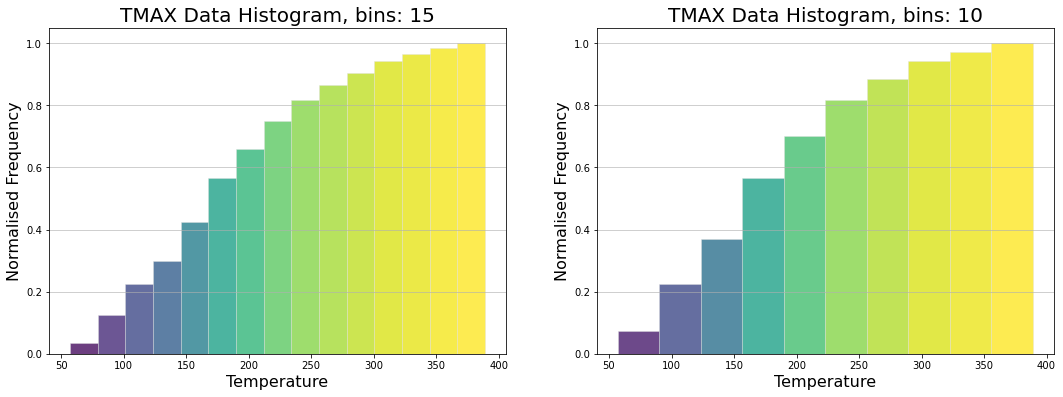

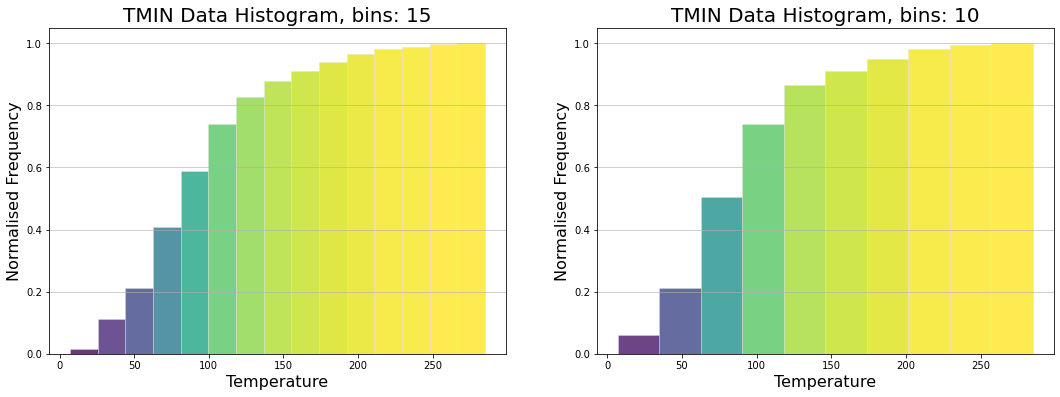

In [66]:
# plot histograms  by calling the function
plt.figure(figsize=(18, 6))
# TMAX histogram
plotHistogram(df1,15, 1, True, True) # 15 bins
plotHistogram(df1,10, 2, True, True) # 10 bins
plt.show()
plt.figure(figsize=(18, 6))
# TMIN histogram 
plotHistogram(df2,15, 1, True, True) # 15 bins
plotHistogram(df2,10, 2, True, True) # 10 bins
plt.show()

#### 4 normalised and cumulative distribution histograms have been plotted, 2 each for TMAX and TMIN respectively with two values of bin size, i.e. 15 and 10 respectively.


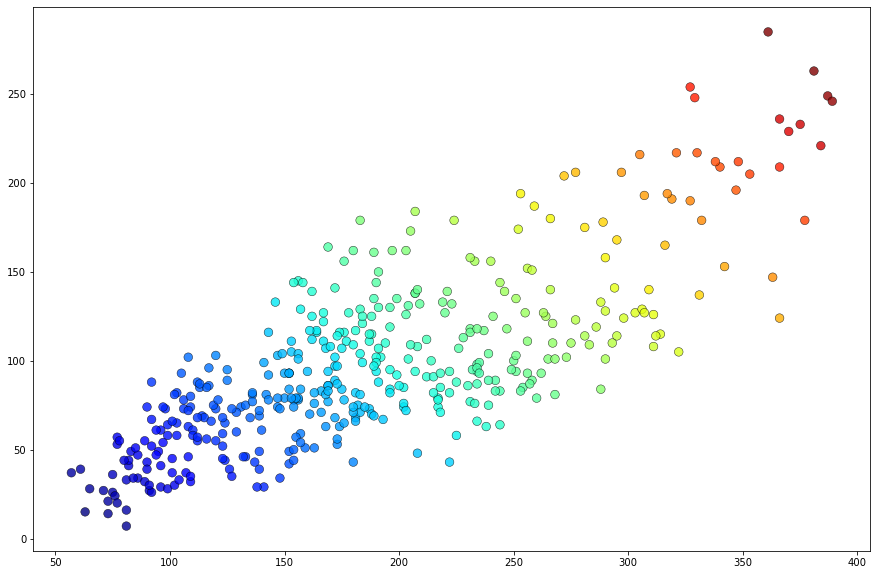

In [48]:
plt.figure(figsize=(15, 10))
plt.scatter(df1, df2, c=df1+df2, cmap="jet", s=75, alpha=0.8, edgecolor='#000000', linewidth = 0.5)
plt.show()

### The Pearson correlation coefficient measures the linear association between variables. Its value can be interpreted like so:

#### +1 - Complete positive correlation
#### +0.8 - Strong positive correlation
#### +0.6 - Moderate positive correlation
#### 0 - no correlation whatsoever
#### -0.6 - Moderate negative correlation
#### -0.8 - Strong negative correlation
#### -1 - Complete negative correlation

In [50]:
print(np.corrcoef(df1, df2)[0][1])

0.7745365160843742
